In [1]:
import pandas as pd
from math import *
import numpy as np
import os

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import statistics as sts

import ahrs

%matplotlib inline

In [2]:
# https://towardsdatascience.com/video-streaming-in-the-jupyter-notebook-635bc5809e85
from ipywidgets import widgets
from ipywidgets import Video, Image
from ipywidgets import Box


## Table of Contents
<br></br>
[Go to Magnetometer](#mag).<br>
[Go to Accelerometer](#acc).<br>
[Go to Gyroscope](#gyro).<br>
[Go to Madgwick](#madgwick).<br>
[Go to Mahony](#mahony).<br>
[Go to Extended Kalman Filter](#efk).<br>
[Go to Algebraic Quaternion Algorithm](#aqua).<br>
[Go to Super-fast Attitude from Accelerometer and Magnetometer](#saam).<br>
[Go to QUaternion ESTimator](#quest).<br>
[Go to Attitude from gravity ](#tilt).<br>
[Go to ROLEQ ](#roleq).<br>
[Go to VPyton Viwer](#viewer).<br>

In [3]:
# ! pip install ahrs

In [6]:
from os import listdir
from os.path import isfile, join


folder_path = os.getcwd()
folder_names = ['files', 'Sensor Files']
folder_selected = 1
file_path = os.path.join(folder_path, folder_names[folder_selected])
files_dict = {}
allfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
files_dict = { i : allfiles[i] for i in range(0, len(allfiles) ) }
selected_file = widgets.Dropdown(options=list(files_dict.values()),description='Choose file:', value=files_dict[0])

    

In [7]:
def run_to_vizualize(ev):
    display(Javascript('IPython.notebook.execute_cell_range(7, 62)'))

button = widgets.Button(description="Run to visualize")
button.on_click(run_to_vizualize)

display(selected_file, button)

Dropdown(description='Choose file:', options=('ball_IMU_tabela_final_fdt8_p2.csv', 'bounce in the parabola.csv…

Button(description='Run to visualize', style=ButtonStyle())

In [8]:
file_path = os.path.join(folder_path, folder_names[folder_selected], selected_file.value)

ball_IMU = pd.read_csv(file_path)

ball_IMU

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,LOCATION Longitude :,LOCATION Altitude ( m),LOCATION Altitude-google ( m),LOCATION Speed ( Kmh),LOCATION Accuracy ( m),LOCATION ORIENTATION (°),Satellites in range,GPS NMEA,Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
0,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.1667,-0.0044,0.1577,-0.0356,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 20,NaN,16,2022-01-10 19:24:25:314
1,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 20,NaN,22,2022-01-10 19:24:25:320
2,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 20,NaN,26,2022-01-10 19:24:25:324
3,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 20,NaN,32,2022-01-10 19:24:25:330
4,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0760,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 20,NaN,37,2022-01-10 19:24:25:335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,0.1917,-0.3716,1.7529,0.4332,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 28,NaN,13312,2022-01-10 19:24:38:610
2660,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 28,NaN,13317,2022-01-10 19:24:38:615
2661,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 28,NaN,13322,2022-01-10 19:24:38:620
2662,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,2.353354,95.2,NaN,NaN,12.854,NaN,0 / 28,NaN,13327,2022-01-10 19:24:38:625


In [9]:
ball_IMU.describe()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,ORIENTATION Y (roll °),LOCATION Latitude :,LOCATION Longitude :,LOCATION Altitude ( m),LOCATION Altitude-google ( m),LOCATION Speed ( Kmh),LOCATION Accuracy ( m),LOCATION ORIENTATION (°),GPS NMEA,Time since start in ms
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,...,2664.000000,2.664000e+03,2.664000e+03,2.664000e+03,0.0,0.0,2.664000e+03,0.0,0.0,2664.000000
mean,-0.139507,-0.383822,7.784708,-0.107526,-0.284017,7.864703,-0.028514,-0.098222,-0.036495,-0.001988,...,2.041445,4.884389e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,6674.360360
std,3.460893,3.746611,2.888140,3.475594,3.766501,2.823328,0.313906,0.313224,0.544323,1.015264,...,26.359435,1.158402e-12,8.661365e-14,4.562541e-12,NaN,NaN,4.619395e-13,NaN,NaN,3845.707942
min,-10.258900,-10.624400,-0.113100,-9.613600,-9.618200,0.985900,-1.191600,-1.332000,-4.696500,-2.849900,...,-76.810000,4.884390e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,16.000000
25%,-0.710675,-0.949100,6.160900,-0.644600,-0.942825,6.425800,-0.207700,-0.252500,-0.281200,-0.311400,...,-2.190000,4.884390e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,3345.750000
50%,-0.332000,-0.278500,9.370600,-0.316800,-0.075950,9.681600,-0.024100,-0.061800,-0.039000,-0.021700,...,1.870000,4.884390e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,6674.000000
75%,0.312300,0.574300,9.732500,0.350900,0.604400,9.769400,0.126400,0.088850,0.209300,0.180150,...,6.560000,4.884390e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,10003.250000
max,9.793500,9.753700,11.931500,9.559200,9.743400,9.806200,1.339000,0.766600,1.841700,4.418300,...,78.920000,4.884390e+01,2.353354e+00,9.520000e+01,NaN,NaN,1.285400e+01,NaN,NaN,13331.000000


In [10]:
ball_IMU.columns

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
       'MAGNETIC FIELD X (μT)', 'MAGNETIC FIELD Y (μT)',
       'MAGNETIC FIELD Z (μT)', 'ORIENTATION Z (azimuth °)',
       'ORIENTATION X (pitch °)', 'ORIENTATION Y (roll °)',
       'LOCATION Latitude : ', 'LOCATION Longitude : ',
       'LOCATION Altitude ( m)', 'LOCATION Altitude-google ( m)',
       'LOCATION Speed ( Kmh)', 'LOCATION Accuracy ( m)',
       'LOCATION ORIENTATION (°)', 'Satellites in range', 'GPS NMEA',
       'Time since start in ms ', 'YYYY-MO-DD HH-MI-SS_SSS'],
      dtype='object')

In [11]:
if 'Time since start in ms ' in ball_IMU.columns:

    orig_columns=['Time since start in ms ',
                  'ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)',
                  'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
                  'MAGNETIC FIELD X (μT)', 'MAGNETIC FIELD Y (μT)', 'MAGNETIC FIELD Z (μT)']
    columns=['elapsed_time', 'ay', 'ax', 'az', 'gy', 'gx', 'gz', 'my', 'mx', 'mz']


    for i, col in enumerate(columns):
        ball_IMU[col] = ball_IMU[orig_columns[i]]
        
    ball_IMU['elapsed_time'] = ball_IMU['elapsed_time']/1000
    
#     columns=['ax', 'az', 'gx', 'gz', 'mx', 'mz']
    columns=['az', 'gz', 'mz']
    for col in columns:
        ball_IMU[col] *= -1
    show_ball = False
else:
    columns=['ay', 'ax', 'az']
    for col in columns:
        ball_IMU[col] = ball_IMU[col] * ahrs.POLAR_NORMAL_GRAVITY
#     columns=['gy', 'gx', 'gz']
#     for col in columns:
#         ball_IMU[col] =  ball_IMU[col] * (np.pi / 180)
    show_ball = True
ball_IMU.head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,elapsed_time,ay,ax,az,gy,gx,gz,my,mx,mz
0,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.1667,-0.0044,0.1577,-0.0356,...,0.016,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.6,0.45,40.12
1,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.022,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.6,0.45,40.12
2,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.026,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.6,0.45,40.12
3,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.032,-0.7011,0.7205,-9.6799,-0.0356,0.0052,0.0425,15.6,0.45,40.12
4,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0760,...,0.037,-0.7011,0.7205,-9.6799,-0.0760,0.0105,0.0148,15.6,0.45,40.12


In [12]:
if 'network_time' in ball_IMU.columns:
    ball_IMU = ball_IMU.sort_values(by=['network_time'])
    temp_elapsed = [(ball_IMU['network_time'][i] - ball_IMU['network_time'][i -1])*15.65/10**12  for i in range(len(ball_IMU['network_time'])) if i > 0]
    temp_elapsed.insert(0,0)
    ball_IMU['step_time'] = temp_elapsed
    total_time = []
    for i, elapsed_time in enumerate(ball_IMU['step_time']):
        if i > 0:
            total_time.append(total_time[i-1] + elapsed_time )
        else:
            total_time.append(0)                             
    ball_IMU['elapsed_time'] = total_time
ball_IMU

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,elapsed_time,ay,ax,az,gy,gx,gz,my,mx,mz
0,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.1667,-0.0044,0.1577,-0.0356,...,0.016,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.60,0.45,40.12
1,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.022,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.60,0.45,40.12
2,-0.7394,0.7277,9.7349,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.026,-0.7394,0.7277,-9.7349,-0.0356,0.0052,0.0425,15.60,0.45,40.12
3,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0356,...,0.032,-0.7011,0.7205,-9.6799,-0.0356,0.0052,0.0425,15.60,0.45,40.12
4,-0.7011,0.7205,9.6799,-0.5724,0.6739,9.7667,-0.2279,0.0711,0.0062,-0.0760,...,0.037,-0.7011,0.7205,-9.6799,-0.0760,0.0105,0.0148,15.60,0.45,40.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,0.1917,-0.3716,1.7529,0.4332,...,13.312,-0.9120,-0.9491,-11.9315,0.4332,0.6166,0.0329,15.23,5.03,39.07
2660,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,13.317,-0.9120,-0.9491,-11.9315,0.4332,0.6166,0.0329,15.23,5.03,39.07
2661,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,13.322,-0.9120,-0.9491,-11.9315,0.4332,0.6166,0.0329,15.23,5.03,39.07
2662,-0.9120,-0.9491,11.9315,-0.2893,0.0542,9.8022,-0.1632,-0.1061,1.2071,0.4332,...,13.327,-0.9120,-0.9491,-11.9315,0.4332,0.6166,0.0329,15.23,5.03,39.07


In [13]:
sum(ball_IMU['step_time'])

KeyError: 'step_time'

In [14]:
average_frequency_list = []
for i in range(int(max(ball_IMU['elapsed_time']))-1):
    
    average_frequency_list.append(len(ball_IMU[(ball_IMU['elapsed_time'] >= i) & (ball_IMU['elapsed_time'] <=i+1)]))
frequency_average = np.mean(average_frequency_list)
frequency_average

199.75

# Sensor data investigation

In [15]:
duration = widgets.FloatRangeSlider(min=0, max=int(max(ball_IMU['elapsed_time'])), continuous_update=False, value=[0, max(ball_IMU['elapsed_time'])])
duration

FloatRangeSlider(value=(0.0, 13.0), continuous_update=False, max=13.0)

In [16]:
l_second = duration.value[0] # in seconds
u_second = duration.value[1] # in seconds

l_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
u_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]
# u_bound = 781

# rows = u_bound-l_bound+1
rows = len(ball_IMU)
print(f'Showing data from item {l_bound} to {u_bound} | {rows} rows: [{l_bound}:{u_bound}]')

Showing data from item 0 to 2597 | 2664 rows: [0:2597]


## Sensors aligned graph

recording data from row 0 to row 2597
sample rate accel: 118000.0 Hz


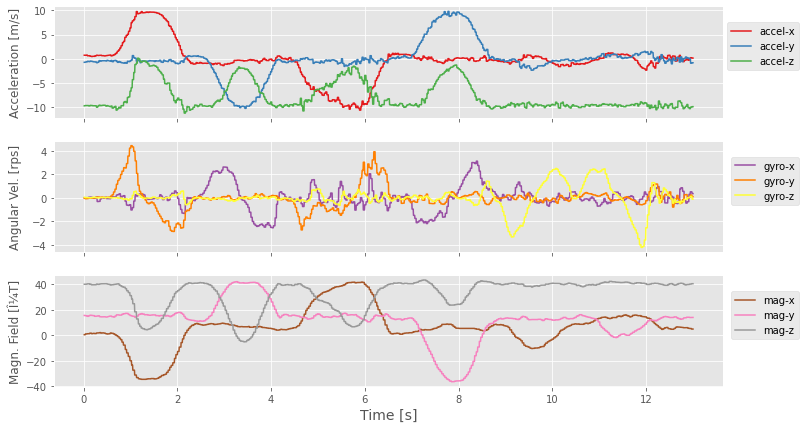

In [17]:
plt.style.use('ggplot') # matplotlib visual style setting

ii = len(ball_IMU['elapsed_time']) # number of points
ii = u_bound
t1 = l_bound # for calculating sample rate

# prepping for visualization
mpu6050_str = ['accel-x','accel-y','accel-z','gyro-x','gyro-y','gyro-z']
AK8963_str = ['mag-x','mag-y','mag-z']
mpu6050_vec,AK8963_vec,t_vec = [],[],[]

print(f'recording data from row {l_bound} to row {u_bound}')
for ii in range(l_bound,ii):
    
    try:
        ax,ay,az,wx,wy,wz = ball_IMU['ax'][ii], ball_IMU['ay'][ii], ball_IMU['az'][ii], ball_IMU['gx'][ii], ball_IMU['gy'][ii], ball_IMU['gz'][ii]
        mx,my,mz = ball_IMU['mx'][ii], ball_IMU['my'][ii], ball_IMU['mz'][ii]
    except:
        continue
    t_vec.append(ball_IMU['elapsed_time'][ii]) # capture timestamp
    AK8963_vec.append([mx,my,mz])
    mpu6050_vec.append([ax,ay,az,wx,wy,wz])
    
print('sample rate accel: {} Hz'.format(ii/(((ball_IMU['elapsed_time'][1]-t1))))) # print the sample rate
# t_vec = np.subtract(t_vec,t_vec[0])
# print(f'time {t_vec}')

# plot the resulting data in 3-subplots, with each data axis
fig,axs = plt.subplots(3,1,figsize=(12,7),sharex=True)
cmap = plt.cm.Set1

ax = axs[0] # plot accelerometer data
for zz in range(0,np.shape(mpu6050_vec)[1]-3):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax.legend(bbox_to_anchor=(1.12,0.9))
ax.set_ylabel('Acceleration [m/s]',fontsize=12)

ax2 = axs[1] # plot gyroscope data
for zz in range(3,np.shape(mpu6050_vec)[1]):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax2.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('Angular Vel. [rps]',fontsize=12)

ax3 = axs[2] # plot magnetometer data
for zz in range(0,np.shape(AK8963_vec)[1]):
    data_vec = [ii[zz] for ii in AK8963_vec]
    ax3.plot(t_vec,data_vec,label=AK8963_str[zz],color=cmap(zz+6))
ax3.legend(bbox_to_anchor=(1.12,0.9))
ax3.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
ax3.set_xlabel('Time [s]',fontsize=14)

fig.align_ylabels(axs)
plt.show()

## Magnetometer<a id='mag'></a>

In [18]:
data_mag = ball_IMU.loc[:,['mx', 'my','mz']]
data_mag.head()

,mx,my,mz
0,0.45,15.6,40.12
1,0.45,15.6,40.12
2,0.45,15.6,40.12
3,0.45,15.6,40.12
4,0.45,15.6,40.12


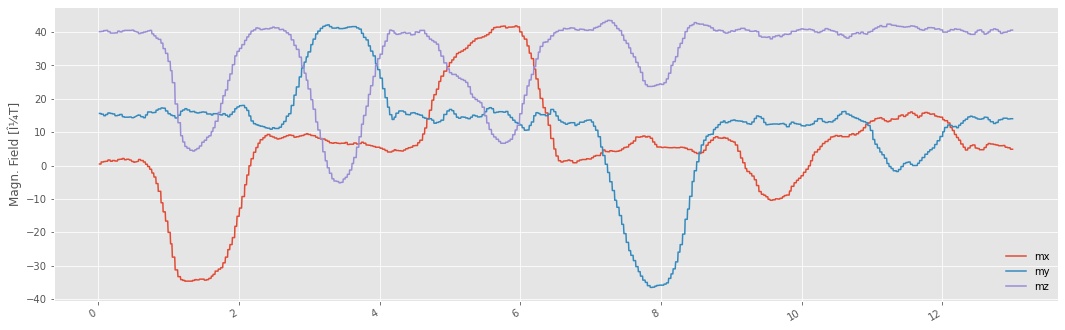

In [19]:
# selected elapsed time
x = ball_IMU['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = data_mag['mx'][l_bound:u_bound]
ax.plot(x,y, label='mx')


# plot y
y = data_mag['my'][l_bound:u_bound]
ax.plot(x,y, label='my')

# plot z
y = data_mag['mz'][l_bound:u_bound]
ax.plot(x,y, label='mz')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
plt.show()

## Calibration

### offset the median value of each column 

In [20]:
data_mag.describe()

,mx,my,mz
count,2664.000000,2664.000000,2664.000000
mean,6.074876,11.588063,32.755116
std,15.302708,14.594550,12.320664
min,-34.650000,-36.530000,-5.180000
25%,1.800000,11.700000,27.300000
50%,6.000000,14.030000,39.450000
75%,9.300000,15.530000,40.570000
max,41.850000,42.150000,43.500000


In [21]:
medians = data_mag.median()
medians

mx     6.00
my    14.03
mz    39.45
dtype: float64

In [22]:
columns=['mx', 'my', 'mz']
calibrated_mag = np.ndarray(shape=(rows, 3), dtype=float)
calibrated_mag = pd.DataFrame(data=calibrated_mag, columns=columns)

for i, col in enumerate(columns):
    print(col, medians[i]*-1, data_mag[col].median())
    calibrated_mag.loc[:, col] = data_mag.loc[:,col] + (medians[i]*-1)
#         calibrated_mag[col] = data_mag[col].shift(medians[i]*-1, axis = 0)
# 
calibrated_mag

mx -6.0 6.0
my -14.03 14.03
mz -39.45 39.45


,mx,my,mz
0,-5.55,1.57,0.67
1,-5.55,1.57,0.67
2,-5.55,1.57,0.67
3,-5.55,1.57,0.67
4,-5.55,1.57,0.67
...,...,...,...
2659,-0.97,1.20,-0.38
2660,-0.97,1.20,-0.38
2661,-0.97,1.20,-0.38
2662,-0.97,1.20,-0.38


In [23]:
medians = calibrated_mag.median()
medians

mx    0.0
my    0.0
mz    0.0
dtype: float64

<IPython.core.display.Javascript object>


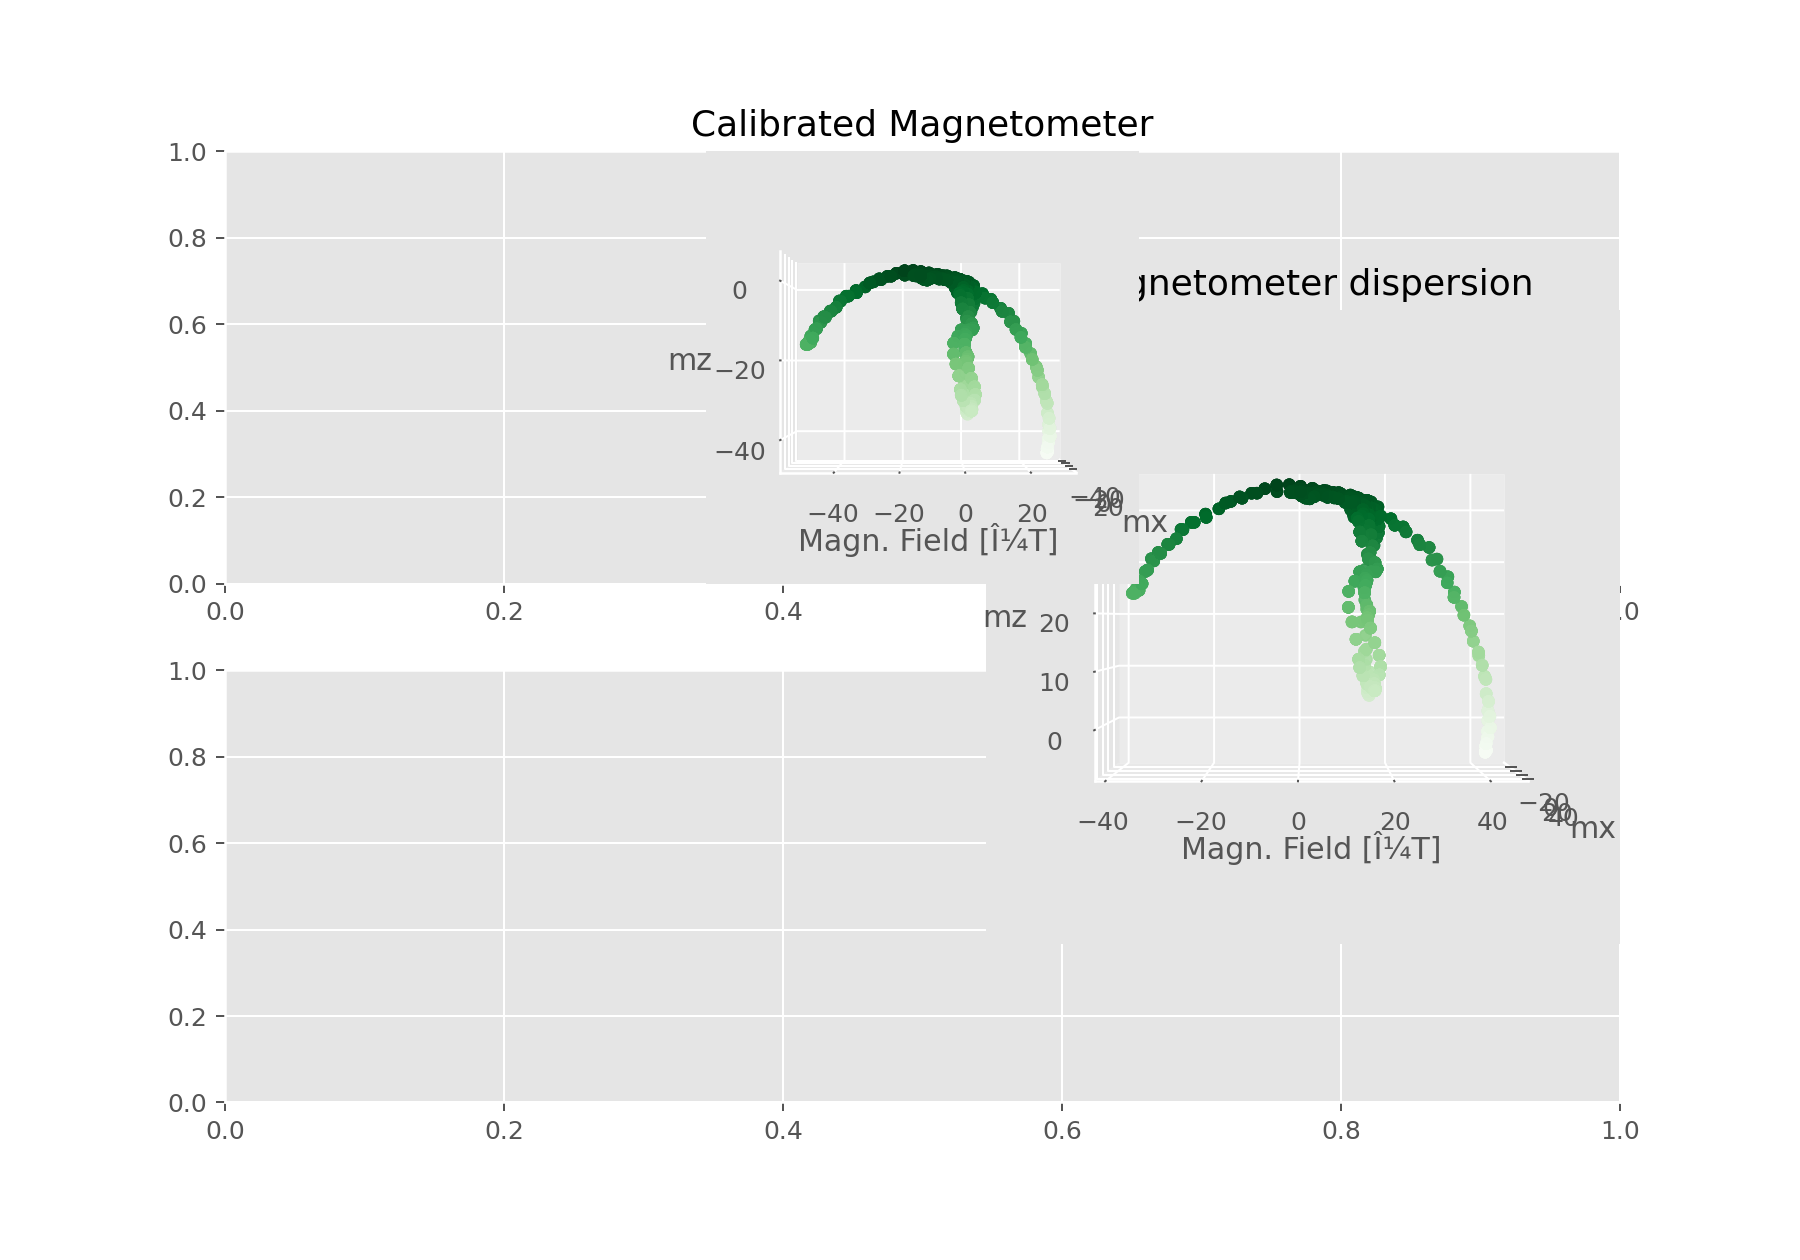

In [24]:
%matplotlib notebook

fig,axs = plt.subplots(2,1, figsize=(10,7))#, sharex=True, sharey=True)
# fig = plt.figure()
axs[0] = fig.add_subplot(122, projection='3d')
# fig.set_size_inches(6, 6)

# plot x
x = data_mag['mx'][l_bound:u_bound]
# plot y
y = data_mag['my'][l_bound:u_bound]
# plot z
z = data_mag['mz'][l_bound:u_bound]

axs[0].set_xlabel("mx")
axs[0].set_ylabel("my")
axs[0].set_zlabel("mz")
axs[0].scatter3D(x, y, z, c=z, cmap='Greens')
axs[0].set_title("Magnetometer dispersion")

# fig2 = plt.figure()
axs[1] = fig.add_subplot(211, projection='3d')
# fig2.set_size_inches(6, 6)

# plot x
x = calibrated_mag['mx'][l_bound:u_bound]
# plot y
y = calibrated_mag['my'][l_bound:u_bound]
# plot z
z = calibrated_mag['mz'][l_bound:u_bound]

axs[1].set_xlabel("mx")
axs[1].set_ylabel("my")
axs[1].set_zlabel("mz")
axs[1].scatter3D(x, y, z, c=z, cmap='Greens')
axs[1].set_title("Calibrated Magnetometer")

# ax.legend(loc='lower right', frameon=False)
axs[0].view_init(0,0)
axs[1].view_init(0,0)
axs[0].set_ylabel('Magn. Field [Î¼T]',fontsize=12)
axs[1].set_ylabel('Magn. Field [Î¼T]',fontsize=12)

plt.show()

In [25]:
%matplotlib inline

# Accelerometer<a id='acc'></a>

In [26]:
data_acc = ball_IMU[['ax', 'ay','az']]
# data_acc.rename(columns={'ax':'x', 'ay':'y', 'az':'z'})
data_acc.head(5)

,ax,ay,az
0,0.7277,-0.7394,-9.7349
1,0.7277,-0.7394,-9.7349
2,0.7277,-0.7394,-9.7349
3,0.7205,-0.7011,-9.6799
4,0.7205,-0.7011,-9.6799


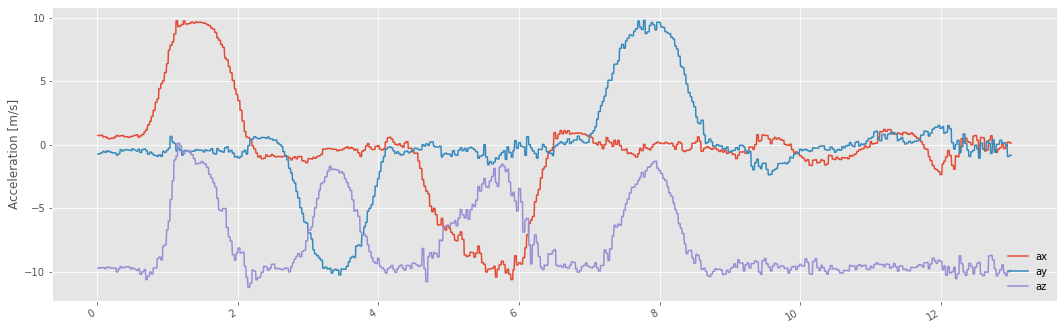

In [27]:
x = ball_IMU['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = data_acc['ax'][l_bound:u_bound]
ax.plot(x,y, label='ax')

# plot y
y = data_acc['ay'][l_bound:u_bound]
ax.plot(x,y, label='ay')

# plot z
y = data_acc['az'][l_bound:u_bound]
ax.plot(x,y, label='az')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Acceleration [m/s]',fontsize=12)
plt.show()

## Gravity & Orientation

In [28]:
if 'GRAVITY X (m/s²)' in ball_IMU.columns:
    gravity_vector = np.array(ball_IMU[['GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)', 'GRAVITY Z (m/s²)']])
else:
    gravity_vector = np.full((rows, 3), [0,0,-1])
gravity_vector[0]

array([-0.5724,  0.6739,  9.7667])

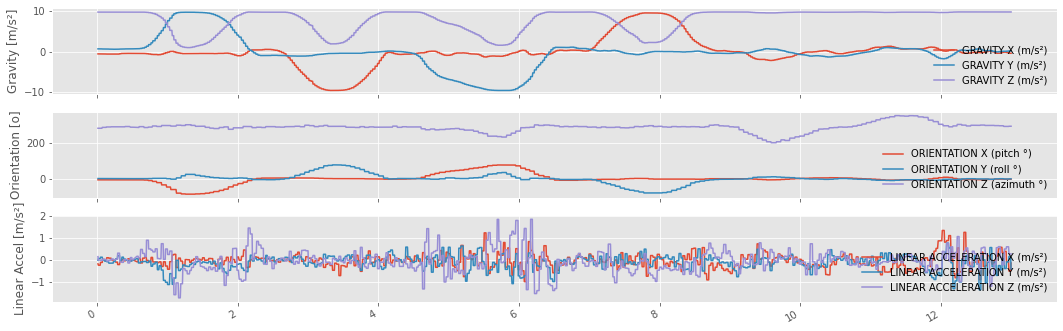

In [31]:
if 'GRAVITY X (m/s²)' in ball_IMU.columns:
    x = ball_IMU['elapsed_time'][l_bound:u_bound]

    g_cols = ['GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)', 'GRAVITY Z (m/s²)']
    o_cols = ['ORIENTATION X (pitch °)', 'ORIENTATION Y (roll °)', 'ORIENTATION Z (azimuth °)']
    l_cols = ['LINEAR ACCELERATION X (m/s²)', 'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)']

    fig, axs = plt.subplots(3, 1)
    fig.set_size_inches(18, 6)

    for col in g_cols:
        y = ball_IMU[col][l_bound:u_bound]
        axs[0].plot(x,y, label=col)
    axs[0].set_ylabel('Gravity [m/s²]',fontsize=12)
    axs[0].legend(loc='lower right', frameon=False)
    for col in o_cols:
        y = ball_IMU[col][l_bound:u_bound]
        axs[1].plot(x,y, label=col)
    axs[1].set_ylabel('Orientation [o]',fontsize=12)
    axs[1].legend(loc='lower right', frameon=False)
    for col in l_cols:
        y = ball_IMU[col][l_bound:u_bound]
        axs[2].plot(x,y, label=col)
    axs[2].set_ylabel('Linear Accel [m/s²]',fontsize=12)
    axs[2].legend(loc='lower right', frameon=False)
    # beautify the x-labels
    plt.gcf().autofmt_xdate()


    plt.show()

# Gyroscope <a id='gyro'></a>

In [32]:
data_gyr = ball_IMU[['gx', 'gy','gz']]
# data_gyr.rename(columns={'gx':'x', 'gy':'y', 'gz':'z'})
data_gyr.head(5)

,gx,gy,gz
0,0.0052,-0.0356,0.0425
1,0.0052,-0.0356,0.0425
2,0.0052,-0.0356,0.0425
3,0.0052,-0.0356,0.0425
4,0.0105,-0.0760,0.0148


In [33]:
data_gyr.describe()

,gx,gy,gz
count,2664.000000,2664.000000,2664.000000
mean,-0.003733,-0.001988,-0.001613
std,0.981455,1.015264,0.991827
min,-2.538700,-2.849900,-4.203500
25%,-0.350600,-0.311400,-0.180725
50%,-0.022500,-0.021700,-0.011900
75%,0.312000,0.180150,0.204800
max,3.105200,4.418300,2.486300


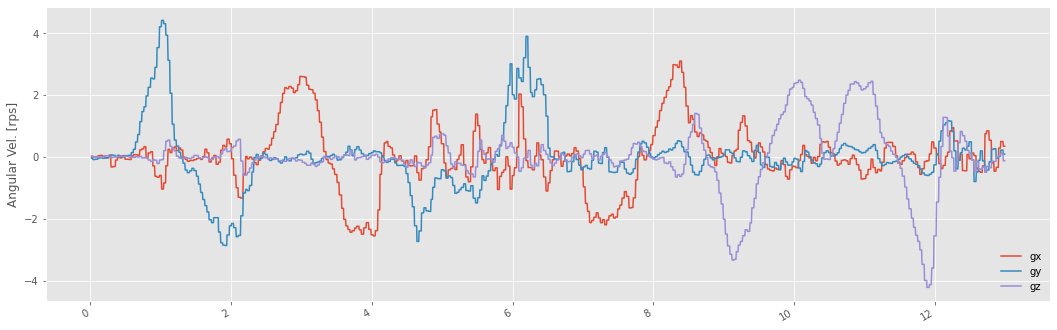

In [34]:
    # selected elapsed time
    x = ball_IMU['elapsed_time'][l_bound:u_bound]

    fig, ax = plt.subplots()
    fig.set_size_inches(18, 6)

    # plot x
    y = data_gyr['gx'][l_bound:u_bound]
    ax.plot(x,y, label='gx')


    # plot y
    y = data_gyr['gy'][l_bound:u_bound]
    ax.plot(x,y, label='gy')

    # plot z
    y = data_gyr['gz'][l_bound:u_bound]
    ax.plot(x,y, label='gz')

    # plot absolute
    # y = raw_data['spin_abs'][l_bound:u_bound]
    # ax.plot(x,y, label='spin_abs')

    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    ax.legend(loc='lower right', frameon=False)
    ax.set_ylabel('Angular Vel. [rps]',fontsize=12)
    plt.show()

# Applying AHRS<a id='ahrs'></a>
https://ahrs.readthedocs.io/en/latest/index.html

In [35]:
from pyquaternion import Quaternion

In [36]:
acc_data = np.array(data_acc)
gyro_data = np.array(data_gyr)
mag_data = np.array(calibrated_mag)
# mag_data = np.array(data_mag)

acc_data.shape, gyro_data.shape, mag_data.shape

((2664, 3), (2664, 3), (2664, 3))

## Madgwick Orientation Filter <a id='madgwick'></a>
https://ahrs.readthedocs.io/en/latest/filters/madgwick.html#madgwick-orientation-filter


In [37]:
from ahrs.filters import Madgwick

### Simple

In [39]:
madgwick = Madgwick(frequency=frequency_average)
madgwick
Qmadgwick = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
    Qmadgwick[t] = madgwick.updateIMU(Qmadgwick[t-1], gyr=gyro_data[t], acc=acc_data[t])

Qmadgwick = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Qmadgwick]
    
Qmadgwick[10:20], type(Qmadgwick[1])

([Quaternion(0.9999945117561321, -0.000979081200924598, -0.00310156899827905, 0.0006309733480738371),
  Quaternion(0.99999344824807, -0.0010592963905528446, -0.003393613858728613, 0.0006817162675750735),
  Quaternion(0.9999922898851036, -0.0011392235195848966, -0.0036858902411420484, 0.0007324979520704258),
  Quaternion(0.9999910366727685, -0.001218934454362645, -0.003978339476673514, 0.0007833185342283314),
  Quaternion(0.99998968824165, -0.0012983028053048067, -0.00427106175734541, 0.0008341772344061259),
  Quaternion(0.9999882444398497, -0.0013773308295027646, -0.004564053703284804, 0.0008850738313120384),
  Quaternion(0.9999867051179215, -0.001456020767462282, -0.004857311988482162, 0.0009360081059103085),
  Quaternion(0.9999857100239761, -0.0014411501358112498, -0.005060192697940056, 0.000947250753683294),
  Quaternion(0.9999846913565238, -0.0014324634941978657, -0.0052579682894085935, 0.0009585772807905551),
  Quaternion(0.9999836321942448, -0.0014234316150685032, -0.005456041592

### MARG

In [40]:
madgwickMARG = Madgwick(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=frequency_average)

QmadgwickMARG = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in madgwickMARG.Q]
    
QmadgwickMARG[10:20], type(QmadgwickMARG[1])

([Quaternion(0.005094305001943332, 0.6037627824068021, -0.7954229577827601, 0.05241057974368442),
  Quaternion(0.004953088343081654, 0.603579577919297, -0.7955634681720375, 0.052401604409678226),
  Quaternion(0.004811922979635651, 0.603396326131455, -0.7957039226397727, 0.052392618792911634),
  Quaternion(0.004669927888072984, 0.6032121681993402, -0.7958451875857951, 0.0523804286571021),
  Quaternion(0.0045279835421215674, 0.6030279621238144, -0.7959863962343157, 0.052368227693408244),
  Quaternion(0.004386089928807868, 0.602843707948669, -0.7961275485751291, 0.052356015906402736),
  Quaternion(0.004244247035166418, 0.6026594057176818, -0.7962686445980459, 0.05234379330069516),
  Quaternion(0.0041167088408463745, 0.6025074367656895, -0.7963763218575247, 0.05246518212146567),
  Quaternion(0.003988548833037509, 0.6023557125864005, -0.7964836644613128, 0.05258763389823616),
  Quaternion(0.0038604795255376394, 0.6022039483701146, -0.7965909545156435, 0.052710079198700334)],
 pyquaternion.q

In [41]:
madgwickMARG = Madgwick(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=frequency_average)
zero_div = 0

QmadgwickMARGUpdate = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
    if t > 0:
        if ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1] > 0:
            madgwickMARG.Dt = 1/(ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1])
        else:
            madgwickMARG.Dt = frequency_average
            zero_div+=1 
            
    QmadgwickMARGUpdate[t] = madgwickMARG.updateIMU(QmadgwickMARGUpdate[t-1], gyr=gyro_data[t], acc=acc_data[t])
    
QmadgwickMARGUpdate = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in madgwickMARG.Q]
    
QmadgwickMARGUpdate[10:20], zero_div, type(QmadgwickMARGUpdate[1])

([Quaternion(0.005094305001943332, 0.6037627824068021, -0.7954229577827601, 0.05241057974368442),
  Quaternion(0.004953088343081654, 0.603579577919297, -0.7955634681720375, 0.052401604409678226),
  Quaternion(0.004811922979635651, 0.603396326131455, -0.7957039226397727, 0.052392618792911634),
  Quaternion(0.004669927888072984, 0.6032121681993402, -0.7958451875857951, 0.0523804286571021),
  Quaternion(0.0045279835421215674, 0.6030279621238144, -0.7959863962343157, 0.052368227693408244),
  Quaternion(0.004386089928807868, 0.602843707948669, -0.7961275485751291, 0.052356015906402736),
  Quaternion(0.004244247035166418, 0.6026594057176818, -0.7962686445980459, 0.05234379330069516),
  Quaternion(0.0041167088408463745, 0.6025074367656895, -0.7963763218575247, 0.05246518212146567),
  Quaternion(0.003988548833037509, 0.6023557125864005, -0.7964836644613128, 0.05258763389823616),
  Quaternion(0.0038604795255376394, 0.6022039483701146, -0.7965909545156435, 0.052710079198700334)],
 8,
 pyquaterni

In [42]:
madgwick3 = Madgwick(gyr=gyro_data, acc=acc_data, frequency=frequency_average)
zero_div = 0

Qmadgwick_IMU = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
#     if t > 0:
#         if ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1] > 0:
#             madgwick3.Dt = 1/(ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1])
#         else:
#             madgwick3.Dt = sampling_rate
#             zero_div+=1 
            
    Qmadgwick_IMU[t] = madgwick3.updateIMU(Qmadgwick_IMU[t-1], gyr=gyro_data[t], acc=acc_data[t])
    
Qmadgwick_IMU = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Qmadgwick_IMU]
    
Qmadgwick_IMU[10:20], zero_div, type(Qmadgwick_IMU[1])

([Quaternion(0.9999945117561321, -0.000979081200924598, -0.00310156899827905, 0.0006309733480738371),
  Quaternion(0.99999344824807, -0.0010592963905528446, -0.003393613858728613, 0.0006817162675750735),
  Quaternion(0.9999922898851036, -0.0011392235195848966, -0.0036858902411420484, 0.0007324979520704258),
  Quaternion(0.9999910366727685, -0.001218934454362645, -0.003978339476673514, 0.0007833185342283314),
  Quaternion(0.99998968824165, -0.0012983028053048067, -0.00427106175734541, 0.0008341772344061259),
  Quaternion(0.9999882444398497, -0.0013773308295027646, -0.004564053703284804, 0.0008850738313120384),
  Quaternion(0.9999867051179215, -0.001456020767462282, -0.004857311988482162, 0.0009360081059103085),
  Quaternion(0.9999857100239761, -0.0014411501358112498, -0.005060192697940056, 0.000947250753683294),
  Quaternion(0.9999846913565238, -0.0014324634941978657, -0.0052579682894085935, 0.0009585772807905551),
  Quaternion(0.9999836321942448, -0.0014234316150685032, -0.005456041592

# Mahony<a id='mahony'></a>

In [43]:
from ahrs.filters import Mahony

### Mahony IMU

In [44]:
QmahonyIMU = Mahony(gyr=gyro_data, acc=acc_data, frequency=frequency_average)   # Using IMU
QmahonyIMU = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in QmahonyIMU.Q]
QmahonyIMU[:5]

[Quaternion(0.03788552050834954, -0.9985933568746408, -0.001306979448583349, -0.037071373677927635),
 Quaternion(0.037902212172437874, -0.9985962782738957, -0.0012046334734216113, -0.03697896953884118),
 Quaternion(0.0379074115752001, -0.9985996294192844, -0.001102700012174771, -0.0368862077749854),
 Quaternion(0.03792313130761151, -0.9986060821665048, -0.001074352580004159, -0.036695701906669875),
 Quaternion(0.03793874224176117, -0.9986124560960924, -0.0010460518335880728, -0.03650643973882891)]

### Mahony MARG

In [45]:
QmahonyMARG = Mahony(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=frequency_average)   # Using IMU
QmahonyMARG = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in QmahonyMARG.Q]
QmahonyMARG[:5]

[Quaternion(0.007314449723259477, 0.6082475737264321, -0.7919593799584922, 0.052742093027439575),
 Quaternion(0.007981438865656217, 0.610660989356693, -0.7900866329202584, 0.05284472719456217),
 Quaternion(0.008650809146872053, 0.6130674383642329, -0.7882073942534326, 0.05293942918879587),
 Quaternion(0.009232164137812287, 0.6155262320152308, -0.7862791817743034, 0.05298370650300443),
 Quaternion(0.00993574199547847, 0.6179492949519367, -0.7843639065751536, 0.053039720602274396)]

### Mahony MARG Updated

In [46]:
orientation = Mahony(frequency=frequency_average)
Q = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
    Q[t] = orientation.updateMARG(Q[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t])
QmahonyMARGUpdated = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Q]
QmahonyMARGUpdated[:5]

[Quaternion(0.999999451308339, -0.00013122773585674103, -0.00034507171084511987, 0.0009803508639634122),
 Quaternion(0.9999978146326285, -0.00026406170474313495, -0.000692518104839925, 0.0019548452771315384),
 Quaternion(0.9999951093665913, -0.00038716997649636595, -0.0010413681410579047, 0.002923507260686816),
 Quaternion(0.999991475227883, -0.0004981845242986711, -0.001493711055673731, 0.0038170814798698925),
 Quaternion(0.9999870178498695, -0.0005901929796357125, -0.0019513169025157644, 0.00466992144660219)]

# Extended Kalman Filter<a id='efk'></a>
https://ahrs.readthedocs.io/en/latest/filters/ekf.html

In [47]:
from ahrs.filters import EKF
from ahrs.common.orientation import acc2q

In [48]:
ekf = EKF(frequency=frequency_average)
num_samples = rows             
Q = np.zeros((num_samples, 4))  # Allocate array for quaternions
Q[0] = acc2q(acc_data[0])       # First sample of tri-axial accelerometer
for t in range(1, num_samples):
     Q[t] = ekf.update(Q[t-1], gyro_data[t], acc_data[t])
        
QEFK = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Q]
QEFK[:5]

[Quaternion(0.037868694883007, -0.9985903977807336, -0.0014093542083448527, -0.037164406744753485),
 Quaternion(-0.031237305573074515, -0.9990370406671409, -0.0012993649789471192, 0.030782036421056338),
 Quaternion(-0.04463855222601179, -0.9980296786843234, -0.0013111129764780429, 0.04407313357585359),
 Quaternion(-0.05251612232002559, -0.9972339099923382, 0.0006390563731622614, 0.05259446040043697),
 Quaternion(-0.05930414159887555, -0.9957103424384787, -0.04086021184189217, 0.05808937801787519)]

### EKF MARG

In [49]:
ekf = EKF(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=frequency_average)
       
QEFKMARG = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in ekf.Q]
QEFKMARG[:5]

[Quaternion(0.0419207553040212, -0.13293516025446805, -0.9897034970066981, 0.03252508963203776),
 Quaternion(-0.22219152391293553, 0.0436430786762888, -0.9737968683056017, -0.021115578682694744),
 Quaternion(-0.21751128307886158, -0.6270344623032756, -0.7427421136877488, 0.08860461258921233),
 Quaternion(-0.27967394318826566, -0.0902408318570321, -0.9558426327830194, -0.0019847220721356555),
 Quaternion(-0.300099232151287, -0.20012880949465015, -0.9323623434483596, 0.024276964224243688)]

### EKF MARG Noise Filtered

In [50]:
noises=[0.1**2, 0.3**2, 0.5**2] # for the gyroscope, accelerometer and magnetometer, respectively.
ekf = EKF(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=50.0, noises=noises, frame='ENU')
       
QEFKMARGnonoise = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in ekf.Q]
QEFKMARGnonoise[:5]

[Quaternion(0.006643738910419305, 0.6058267008234215, -0.7938254073715308, 0.052641161785449725),
 Quaternion(0.07398276699847664, 0.5772696533180922, -0.803295359509501, 0.12650242264779032),
 Quaternion(0.0704182373541391, 0.5973645938843084, -0.7882364098867346, 0.12992373128202284),
 Quaternion(0.07411772437115907, 0.5834249680828612, -0.798626900421084, 0.12773779188386472),
 Quaternion(0.07302647524455116, 0.5875115277490621, -0.7956523963106766, 0.12819751526608456)]

# AQUA filter<a id='aqua'></a>
https://ahrs.readthedocs.io/en/latest/filters/aqua.html


In [51]:
from ahrs.filters import AQUA

In [52]:
gyr_in_rad = True

if not gyr_in_rad:
    gyro_data = np.array([[radians(gx), radians(gy), radians(gz)] for gx, gy, gz in data_gyr.values])
    gyro_data

In [53]:
alpha = 0.5
belta = 0.5
cutoff = 0.8
threshold = 0.9
zero_div = 0
aqua_quaternions = AQUA(gyr=gyro_data, acc=acc_data, mag=mag_data, alpha=alpha, belta=belta, cutoff=cutoff, threshold=threshold, frequency=frequency_average)

Q_aqua = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in aqua_quaternions.Q]
    
Q_aqua[10:20], type(Q_aqua[1])

([Quaternion(-0.044952598329951445, -0.234025183466043, -0.9709093692209478, 0.02337678690608158),
  Quaternion(-0.04498499019393783, -0.23300730980244552, -0.9711569595377327, 0.023197072602061025),
  Quaternion(-0.04497984211052968, -0.23159486587094338, -0.971496140687248, 0.02314909362619674),
  Quaternion(-0.044960933322182636, -0.23019868069148577, -0.9718286029226773, 0.02315703832649925),
  Quaternion(-0.04081344889885587, -0.22888209113724886, -0.9723662819146022, 0.021238280090278852),
  Quaternion(-0.03872755578438355, -0.22755180444568132, -0.9727837516103448, 0.020300869916957804),
  Quaternion(-0.037672054178003275, -0.226222513215267, -0.9731443609789934, 0.019855567062281938),
  Quaternion(-0.03713153236940807, -0.2249004572523874, -0.9734755474914327, 0.01965685803535929),
  Quaternion(-0.0369105799495638, -0.2239269127919501, -0.9737094490892165, 0.019602437849096967),
  Quaternion(-0.037415893188006435, -0.22299251068145803, -0.9738694450061612, 0.021276635079709238)

In [54]:
 from ahrs.filters.aqua import adaptive_gain

In [55]:
>>> alpha = 0.1   # Best gain in static conditions
>>> acc = np.array(acc_data[:5])   # Measured acceleration. Quasi-static state.
>>> adaptive_gain(alpha, acc)

0.0

In [56]:
>>> acc = np.array(acc_data[5:10])  # New measured acceleration. Slightly above first threshold.
>>> adaptive_gain(alpha, acc)

0.0

In [57]:
aqua_quaternions = AQUA(alpha=alpha, belta=belta, cutoff=cutoff, threshold=threshold, frequency=frequency_average)

Q_aqua = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
    Q_aqua[t] = aqua_quaternions.updateMARG(Q_aqua[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t])
    
Q_aquaUpdate = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Q_aqua]
    
Q_aquaUpdate[10:20], type(Q_aqua[1])

([Quaternion(0.5484628427463454, 0.5988976484467293, 0.5834880079088388, 0.007201488606555029),
  Quaternion(0.5033595289947169, 0.6131273539741914, 0.6088504315533488, 0.0022769225116917465),
  Quaternion(0.46151321863209555, 0.6234573763367834, 0.6311123018528917, -0.0019264913813916758),
  Quaternion(0.42377818404928963, 0.6306978428234405, 0.6500807269981604, -0.005227826248861852),
  Quaternion(0.3881283911321894, 0.6360585469678348, 0.6668762887330846, -0.007867169242648473),
  Quaternion(0.35533698685518095, 0.6395849990285019, 0.6815929498402018, -0.00988461018577467),
  Quaternion(0.32529689456636063, 0.6416020636099271, 0.6945493643318221, -0.011397493725694338),
  Quaternion(0.2978676784893513, 0.6423824551038887, 0.7060193525819319, -0.012502050466014821),
  Quaternion(0.2730078838668421, 0.6424027107882515, 0.7159694569108754, -0.013160140166475685),
  Quaternion(0.25067645953847456, 0.641608514494671, 0.7247820837438902, -0.01381151132431557)],
 numpy.ndarray)

# Quest filter<a id='quest'></a>
https://ahrs.readthedocs.io/en/latest/filters/quest.html

In [58]:
from ahrs.filters import QUEST

In [59]:
weight = [0.8, 0.2]


quest_quaternions = QUEST(acc=acc_data, mag=mag_data, weight=weight, frequency=frequency_average)

Q_quest = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
for t in range(1, rows):
    if t > 0:
        if ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1] > 0:
            quest_quaternions.Dt = 1/(ball_IMU['elapsed_time'][t] - ball_IMU['elapsed_time'][t-1])
        else:
            quest_quaternions.Dt = 1/100
            zero_div+=1 
            
    Q_quest[t] = (quest_quaternions.estimate(mag=mag_data[t], acc=acc_data[t]))
# Q_quest = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Q_quest]
    
Q_quest[10:20], zero_div, type(Q_quest[1])

(array([[ 0.26563324, -0.15080027, -0.89719519,  0.3189656 ],
        [ 0.26563324, -0.15080027, -0.89719519,  0.3189656 ],
        [ 0.2311134 , -0.10928815, -0.94290393,  0.21348274],
        [ 0.2311134 , -0.10928815, -0.94290393,  0.21348274],
        [ 0.23111026, -0.10929095, -0.94290367,  0.21348586],
        [ 0.23111026, -0.10929095, -0.94290367,  0.21348586],
        [ 0.23111026, -0.10929095, -0.94290367,  0.21348586],
        [ 0.23111026, -0.10929095, -0.94290367,  0.21348586],
        [ 0.20632797, -0.14349664, -0.92316034,  0.29088224],
        [ 0.20633182, -0.14349473, -0.9231602 ,  0.29088089]]),
 8,
 numpy.ndarray)

# Super-fast Attitude from Accelerometer and Magnetometer filter <a id='saam'></a>
https://ahrs.readthedocs.io/en/latest/filters/saam.html

In [60]:
from ahrs.filters import SAAM

In [61]:

saam_quaternions = SAAM(acc=acc_data, mag=mag_data)
# print(saam_quaternions.Q[0:10])
Q_saam = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
Q_saam = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in saam_quaternions.Q]
    
Q_saam[0:10]

[Quaternion(0.04192075530402151, -0.1329351602544683, -0.989703497006698, 0.03252508963203803),
 Quaternion(0.04192075530402151, -0.1329351602544683, -0.989703497006698, 0.03252508963203803),
 Quaternion(0.04192075530402151, -0.1329351602544683, -0.989703497006698, 0.03252508963203803),
 Quaternion(0.04154727992574352, -0.13322787406047884, -0.9897350307043286, 0.03080139770853318),
 Quaternion(0.04154727992574352, -0.13322787406047884, -0.9897350307043286, 0.03080139770853318),
 Quaternion(0.04137560368899529, -0.12772996500730707, -0.9904595668017977, 0.03103162885506529),
 Quaternion(0.04137560368899529, -0.12772996500730707, -0.9904595668017977, 0.03103162885506529),
 Quaternion(0.04137560368899529, -0.12772996500730707, -0.9904595668017977, 0.03103162885506529),
 Quaternion(0.0425053564099266, -0.12840435852037776, -0.990426611965275, 0.027581546374739425),
 Quaternion(0.0425053564099266, -0.12840435852037776, -0.990426611965275, 0.027581546374739425)]

# Attitude from gravity (Tilt) <a id='tilt'></a>
https://ahrs.readthedocs.io/en/latest/filters/tilt.html

In [62]:
from ahrs.filters import Tilt

In [63]:

Tilt_quaternions = Tilt(acc=acc_data, frequency=frequency_average)
# print(Tilt_quaternions.Q[0:10])
Q_tilt = np.tile([1., 0., 0., 0.], (rows, 1)) # Allocate for quaternions
Q_tilt = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in Tilt_quaternions.Q]
    
Q_tilt[0:5]

[Quaternion(0.037868694883007, -0.9985903977807336, -0.0014093542083448527, -0.037164406744753485),
 Quaternion(0.037868694883007, -0.9985903977807336, -0.0014093542083448527, -0.037164406744753485),
 Quaternion(0.037868694883007, -0.9985903977807336, -0.0014093542083448527, -0.037164406744753485),
 Quaternion(0.03611841116874927, -0.9986607556819579, -0.0013388393157815392, -0.03701841358935412),
 Quaternion(0.03611841116874927, -0.9986607556819579, -0.0013388393157815392, -0.03701841358935412)]

# Recursive Optimal Linear Estimator of Quaternion<a id='roleq'></a>

In [64]:
>>> from ahrs.filters import ROLEQ

In [65]:
orientation = ROLEQ(gyr=gyro_data, acc=acc_data, mag=mag_data, frequency=frequency_average)
Q_ROLEQ = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in orientation.Q]
    
Q_ROLEQ[0:5]

[Quaternion(0.0419207553040212, -0.13293516025446805, -0.9897034970066981, 0.03252508963203776),
 Quaternion(-0.9512508948414315, -0.03464494428458418, -0.27940175103067516, -0.12592110394960246),
 Quaternion(-0.8599919038996492, -0.089575344153727, -0.49050881872083524, -0.10858766828645304),
 Quaternion(-0.8739731976293053, -0.07589208794889474, -0.46934573608433433, -0.1006271376509294),
 Quaternion(-0.8734705286659289, -0.08334443757425447, -0.47057536446310266, -0.09306861252813435)]

## Attitude from angular rate

In [66]:
from ahrs.filters import AngularRate

In [67]:
angular_rate = AngularRate(gyr=gyro_data, frequency=frequency_average)
angular_rate.Q
Q_angular = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in angular_rate.Q]
Q_angular[:5]

[Quaternion(1.0, 0.0, 0.0, 0.0),
 Quaternion(0.9999999902861995, 1.3016270295776587e-05, -8.911138894800894e-05, 0.00010638297837894328),
 Quaternion(0.9999999611447979, 2.6032540338678268e-05, -0.00017822277616479735, 0.0002127659546911205),
 Quaternion(0.9999999125757961, 3.904880987583014e-05, -0.00026733415991914475, 0.00031914892686976556),
 Quaternion(0.9999998297423146, 6.538247067550354e-05, -0.00045756499267794834, 0.0003561948229203868)]

### Angular + Tilt

In [68]:
tilt = Tilt()
q_initial = tilt.estimate(acc=acc_data[0], mag=mag_data[0])
angular_rate = AngularRate(gyr=gyro_data, q0=q_initial, frequency=frequency_average)
Q_angular_tilt_mag = [Quaternion(qw, qx, qy, qz) for qw, qx, qy, qz in angular_rate.Q]
Q_angular_tilt_mag[:5]

[Quaternion(1.0, 0.0, 0.0, 0.0),
 Quaternion(0.9999999902861995, 1.3016270295776587e-05, -8.911138894800894e-05, 0.00010638297837894328),
 Quaternion(0.9999999611447979, 2.6032540338678268e-05, -0.00017822277616479735, 0.0002127659546911205),
 Quaternion(0.9999999125757961, 3.904880987583014e-05, -0.00026733415991914475, 0.00031914892686976556),
 Quaternion(0.9999998297423146, 6.538247067550354e-05, -0.00045756499267794834, 0.0003561948229203868)]

## Quaternion dictionary

In [69]:
quaternions_filters = ['',Qmadgwick, QmadgwickMARG, QmadgwickMARGUpdate, Qmadgwick_IMU, 
                       QmahonyIMU, QmahonyMARG, QmahonyMARGUpdated,
                       QEFK, QEFKMARG, QEFKMARGnonoise,
                       Q_aqua, Q_aquaUpdate,
                       Q_quest, 
                       Q_saam,
                       Q_tilt,
                       Q_ROLEQ,
                      Q_angular, Q_angular_tilt_mag]
quaternions_names = ['','Madgwick simple', 'Madgwick MARG', 'Madgwick MARG Update', 'Madgwick IMU', 
                     'Mahony IMU', 'Mahony Marg', 'Mahony MARG Updated',
                     'Extended Kalman Filter', 'Extended Kalman Filter MARG', 'Extended Kalman Filter MARG Noise reduction',
                     'Algebraic Quaternion Algorithm', 'Algebraic Quaternion Algorithm Updated',
                     'QUaternion ESTimator', 
                     'Super-fast Attitude from Accelerometer and Magnetometer', 
                     'Attitude from gravity',
                     'Recursive Optimal Linear Estimator of Quaternion',
                    'Attitude from angular rate', 'Attitude from angular rate + tilt']
quaternions_dict = { quaternions_names[i] : quaternions_filters[i] for i in range(0, len(quaternions_names) ) }

list(quaternions_dict.keys())

['',
 'Madgwick simple',
 'Madgwick MARG',
 'Madgwick MARG Update',
 'Madgwick IMU',
 'Mahony IMU',
 'Mahony Marg',
 'Mahony MARG Updated',
 'Extended Kalman Filter',
 'Extended Kalman Filter MARG',
 'Extended Kalman Filter MARG Noise reduction',
 'Algebraic Quaternion Algorithm',
 'Algebraic Quaternion Algorithm Updated',
 'QUaternion ESTimator',
 'Super-fast Attitude from Accelerometer and Magnetometer',
 'Attitude from gravity',
 'Recursive Optimal Linear Estimator of Quaternion',
 'Attitude from angular rate',
 'Attitude from angular rate + tilt']

## Quaternion manipulation

In [70]:
from pyquaternion import Quaternion

In [71]:
select_filter = widgets.Dropdown(options=list(quaternions_dict.keys()),description='Choose filter:', value=list(quaternions_dict.keys())[2])
select_filter

Dropdown(description='Choose filter:', index=2, options=('', 'Madgwick simple', 'Madgwick MARG', 'Madgwick MAR…

In [72]:
quaternions = np.array([Quaternion([qw, qx, qy, qz]) for qw, qx, qy, qz in quaternions_dict[select_filter.value]])

In [73]:
t=1
Gg_q = [np.matmul(np.transpose(quaternions[t].rotation_matrix),acc_data[t]) for t in range(rows)]
Gg_sum = [Gg_q[t].sum() for t in range(rows)]
Gg_q[:5], Gg_sum[:10]

([array([-0.20556808, -0.15669676,  9.7866095 ]),
  array([-0.20473534, -0.15564643,  9.78664372]),
  array([-0.20390197, -0.15460983,  9.78667755]),
  array([-0.2318825 , -0.14054874,  9.72818596]),
  array([-0.22913264, -0.13915755,  9.72827111])],
 [9.42434466316588,
  9.426261948224008,
  9.428165747905759,
  9.355754721316151,
  9.359980923689877,
  9.364203972457139,
  9.368423868317928,
  9.372603368698364,
  9.308018980777916,
  9.312244610799405])

In [74]:
t=1
accel_vector = np.matmul(quaternions[t].rotation_matrix,Gg_q[t])
accel_vector, acc_data[t]

(array([ 0.7277, -0.7394, -9.7349]), array([ 0.7277, -0.7394, -9.7349]))

### NED Orientation

In [75]:
NEDaccel = np.array([np.matmul(quaternions[t].inverse.rotation_matrix,acc_data[t]) for t in range(rows)])
NEDaccel

array([[-0.20556808, -0.15669676,  9.7866095 ],
       [-0.20473534, -0.15564643,  9.78664372],
       [-0.20390197, -0.15460983,  9.78667755],
       ...,
       [ 1.77761044,  1.87189801, 11.72302546],
       [ 1.73418631,  1.89545188, 11.72574463],
       [ 0.91425496,  0.6106751 ,  9.32495353]])

In [76]:
if not show_ball:
    NEDsendor = np.array(np.transpose(ball_IMU[['ORIENTATION Z (azimuth °)', 'ORIENTATION X (pitch °)', 'ORIENTATION Y (roll °)']])).astype(float)
    print(NEDaccel), print(NEDsendor)

[[-0.20556808 -0.15669676  9.7866095 ]
 [-0.20473534 -0.15564643  9.78664372]
 [-0.20390197 -0.15460983  9.78667755]
 ...
 [ 1.77761044  1.87189801 11.72302546]
 [ 1.73418631  1.89545188 11.72574463]
 [ 0.91425496  0.6106751   9.32495353]]
[[281.7  281.7  281.7  ... 291.5  291.5  291.5 ]
 [ -3.98  -3.98  -3.98 ...  -0.71  -0.71  -0.71]
 [  3.25   3.25   3.25 ...   1.56   1.56   1.56]]


In [77]:
show_ball

False

# Getting positional data

In [78]:
if show_ball:
    folder_selected = 0
    file_path = os.path.join(folder_path, folder_names[folder_selected])
    files_dict = {}
    allfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    files_dict = { i : allfiles[i] for i in range(0, len(allfiles) ) }
    position_file = widgets.Dropdown(options=list(files_dict.values()),description='Choose file:', value=files_dict[2])
    display(position_file)

In [79]:
if show_ball:
    file_path = os.path.join(folder_path, folder_names[folder_selected], position_file.value)

    ball_df = pd.read_csv(file_path)

    ball_df

In [80]:
if show_ball:
    x_lower, x_upper = 60, 120
    y_lower, y_upper = 0, 80

    #normalizing x axis to the pitch size
    ball_x = ball_df['ball_pos_x']
    old_min = ball_x.min()
    old_max = ball_x.max()

    # l_norm = [lower + (upper - lower) * x for x in ball_x]
    l_norm = [( (x - old_min) / (old_max - old_min) ) * (x_upper - x_lower) + x_lower for x in ball_x]
    ball_df['ball_norm_x'] = l_norm

    #normalizing y axis to the pitch size
    ball_y = ball_df['ball_pos_y']
    old_min = ball_y.min()*0
    old_max = ball_y.max()*0+2500

    # l_norm = [lower + (upper - lower) * x for x in ball_x]
    l_norm = [( (y - old_min) / (old_max - old_min) ) * (y_upper - y_lower) + y_lower for y in ball_y]
    ball_df['ball_norm_y'] = l_norm

    ball_df[['ball_pos_x', 'ball_norm_x', 'ball_pos_y','ball_norm_y']]

# Visualization with quaternions<a id='viewer'></a>

In [81]:
from vpython import *
if show_ball: from mplsoccer.pitch import Pitch

<IPython.core.display.Javascript object>

In [82]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all_above(ev):
    display(Javascript('IPython.notebook.execute_cell_range(6, IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Run all with new file")
button.on_click(run_all_above)
display(selected_file, button)

Dropdown(description='Choose file:', index=18, options=('ball_IMU_tabela_final_fdt8_p2.csv', 'bounce in the pa…

Button(description='Run all with new file', style=ButtonStyle())

In [83]:
select_filter = widgets.Dropdown(options=list(quaternions_dict.keys()),description='Choose filter:', value=list(quaternions_dict.keys())[2])
select_filter

def run_all_below(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())-10'))

button = widgets.Button(description="Run with selected filter")
button.on_click(run_all_below)
duration = widgets.IntRangeSlider(min=0, max=max(ball_IMU['elapsed_time']), continuous_update=False, value=[0, max(ball_IMU['elapsed_time'])])
display(select_filter, button, duration)

Dropdown(description='Choose filter:', index=2, options=('', 'Madgwick simple', 'Madgwick MARG', 'Madgwick MAR…

Button(description='Run with selected filter', style=ButtonStyle())

IntRangeSlider(value=(0, 13), continuous_update=False, max=13)

In [84]:
l_second = duration.value[0] # in seconds
u_second = duration.value[1] # in seconds
l_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
u_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]
print(f'Visualizing second from {l_second}s to {u_second}s | rows: [{l_bound}:{u_bound}] with {select_filter.value}')

quaternions = np.array([Quaternion([qw, qx, qy, qz]) for qw, qx, qy, qz in quaternions_dict[select_filter.value]])

Visualizing second from 0s to 13s | rows: [0:2597] with Madgwick MARG


In [85]:
if show_ball:
    l_limit_s = l_second # in seconds
    u_limit_s  = u_second # in seconds

    min_bound = l_bound
    max_bound = u_bound

    num_frames = rows
    print(min_bound, max_bound, num_frames)

    ball_x = np.array(ball_df['ball_norm_x'])#[min_bound:max_bound])
    ball_y =  np.array(ball_df['ball_norm_y'])#[min_bound:max_bound])

In [86]:
show_ball = True

In [87]:
# ------------------------------ Animated Graph --------------------------
show_graph = False
if show_ball and show_graph:
    %matplotlib notebook

    xmin = min(ball_x)
    xmax = max(ball_x)

    ymin = min(ball_y)
    ymax = max(ball_y)
    
    fig, ax = plt.subplots(figsize=(12, 9))
    fig.set_facecolor('#c2d59d')
    ax.patch.set_facecolor('#22312b')


    pitch = Pitch(pitch_color='grass',stripe_color='#c2d59d', stripe=True, 
                  line_color='white', axis=True, label=True, half=True,goal_type='box')
    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()


    # fig, ax = plt.subplots(1, 1, figsize=(10,7.5))
    # ax.set_aspect('equal')
    # ax.set_xlim(xmin, xmax)
    # ax.set_ylim(ymin, ymax)
    # ax.hold(True)

    plt.show(True)
    plt.draw()

    x, y = ball_x[0], ball_y[0]

    points = ax.plot(x, y, 'o')[0]
    
# ------------------------------ VPYTHON --------------------------

scene = canvas()
scene.caption = f'Filter selected: {select_filter.value}'
scene.append_to_caption('\n\n')
scene.forward = vector(1, -1, -1)
scene.background = color.gray(.2)



ball_r = 15.
arrowL = ball_r+4
arrowT = 0.5

# show_ball = True
speed = 0
show_phone = not show_ball
show_trail = True

# logo = text(text='The NEXT Company',height=1, length=1, depth=1, pos=vector(ball_r, -ball_r, 0), color=color.black, start_face_color=color.black, end_face_color=color.green, visible=show_ball)
logo = box(height=1, length=1, width=10, pos=vector(-ball_r, 0, 0), color=color.black, visible=show_ball, emissive=True)
myBall = sphere(radius=ball_r, color=vector(1,1,0), opacity=.9, pos=vector(0, 0, 0), visible=show_ball, make_trail=show_trail, retain=30)
ball = compound([logo, myBall], visible=show_ball)

trail = curve(color=color.white)

ground = box(pos=vector(0, -ball_r, 0), length=2000, width=1000, height=5, opacity=.6, color=color.green)


phonebox = box(length=ball_r, width=ball_r/2, heght=ball_r/10, opacity=.8, pos=vector(0, 0, 0), color=vector(0.2,0.2,0.2))
screen = box(length=ball_r*.8, width=ball_r*.4, heght=.5, pos=vector(-.5, +.15, 0), color=color.white, emissive=True)
phone = compound([phonebox, screen], visible=show_phone)


g_vector = vector(gravity_vector[0][0], gravity_vector[0][1], gravity_vector[0][2])
g_vector= vector(0, -1, 0)
gArrow = arrow(axis=g_vector, color=vector(1, 1, 1), length=arrowL+8, shaftwidth=arrowT)

k=vector(arrowL, 0, 0)
s=vector(0, 0, arrowL)
v=vector(0, arrowL, 0)

frontArrow = arrow(axis=k, color=k, length=arrowL*2, shaftwidth=arrowT)
upArrow = arrow(axis=v, color=v, length=arrowL*1.2, shaftwidth=arrowT)
sideArrow = arrow(axis=s, color=s, length=arrowL*1.2, shaftwidth=arrowT)



frontBall = sphere(radius=0.5, pos=frontArrow.axis, color=k, make_trail=show_trail, retain=15, emissive=True)
upBall = sphere(radius=0.5, pos=upArrow.axis, color=v, make_trail=show_trail, retain=15, emissive=True)
sideBall = sphere(radius=0.5, pos=sideArrow.axis, color=s, make_trail=show_trail, retain=15, emissive=True)


counter = label(text='Elapsed Time: '+str(0), pos=vector(20, -ball_r-4, 20), color=color.white, opacity=.8)
# values = label(text='Quaternion: Qw=0, Qx=0, Qy=0, Qz=0', pos=vector(-10, ball_r+10, -3), color=color.white, opacity=.8)
# result_angles = label(text='Angles: Roll=0, Pitch=0, Yaw=0', pos=vector(-5, ball_r+7, -3), color=color.white, opacity=.8)


run_pause_btn = widgets.Button(description='Pause')

container = widgets.HBox(children=[run_pause_btn])
display(container)

running = True

def runningToggle(s):
    global running
    running = not running
    if s.description == 'Run': s.description = 'Pause'
    else: s.description = 'Run'

run_pause_btn.on_click(runningToggle)
# scene.bind("click", runningToggle)

print(k.value, s, v)
v_rotated = v
while True:

    if running:
        for i in range(l_bound, u_bound):
            
            if show_ball and show_graph:
                x, y = ball_x[i], ball_y[i]
                points.set_data(x, y)

                fig.canvas.draw()
            
            rate(50+speed*show_ball)

            qw, qx, qy, qz = quaternions[i]

            try:    
                roll = atan2(2*(qw*qx+qy*qz), 1-2*(qx**2+qy**2))
                pitch = asin(2*(qw*qy-qz*qx))
                yaw = - atan2(2*(qw*qz+qx*qy), 1-2*(qy**2+qz**2))
            except ValueError:
                pass


            k = vector(cos(yaw)*cos(pitch), sin(pitch), sin(yaw) * cos(pitch))
            y = vector(0, 1, 0)
            s = cross(k, y)
            v = cross(s, k)
            v_rotated = v * cos(roll) + cross(k, v) * sin(roll)

            # Using quaternions
        #     k = quaternion.rotate(k.value)    
        #     k = vector(k[0],k[1],k[2])
        #     s = quaternion.rotate(s.value)  
        #     s = vector(s[0],s[1],s[2])
        #     v = quaternion.rotate(v_rotated.value)  
        #     v = vector(v[0],v[1],v[2])
        #     v_rotated = v


        #     print(v_rotated)

#             g_vector = vector(gravity_vector[i][0], gravity_vector[i][1], gravity_vector[i][2])
#             gArrow.axis=g_vector
            
            counter.text = 'Elapsed Time: '+str(ball_IMU['elapsed_time'][i]) + 's'


            scene.caption = f'''Filter selected: {select_filter.value}
File: {selected_file.value} - second {l_second}s to {u_second}s | rows: {l_bound}:{u_bound}
Elapsed Time: {str(ball_IMU['elapsed_time'][i])}s
Quaternion: Qw={round(qw, 2)}, Qx={round(qx, 2)}, Qy={round(qy, 2)}, Qz={round(qz, 2)}
Angles: Roll={round(roll, 2)}, Pitch={round(pitch, 2)}, Yaw={round(yaw, 2)}'
Vectors:
k: {k}
s: {s}
v: {v_rotated}
'''
            # trying to change the position of the ball...
#             frontArrow.axis = vector(k.value[0] * ball_x[i]/100, k.value[1], k.value[2] * ball_y[i]/100)
#             upArrow.axis = vector(v_rotated.value[0] * ball_x[i]/100, v_rotated.value[1], v_rotated.value[2] * ball_y[i]/100)
#             sideArrow.axis =  vector(cross(k,v_rotated).value[0] * ball_x[i]/100, cross(k,v_rotated).value[1], cross(k,v_rotated).value[2] * ball_y[i]/100)
            
            frontArrow.axis = k
            upArrow.axis = v_rotated
            sideArrow.axis = cross(k,v_rotated)
            
            frontArrow.length = arrowL
            upArrow.length = arrowL
            sideArrow.length = arrowL
            
            frontBall.pos = arrowL *  k
            upBall.pos = arrowL * v_rotated
            sideBall.pos = arrowL * cross(k,v_rotated)

            phone.axis = k
            phone.up = v_rotated
            ball.up = v_rotated
            ball.axis = k
             # trying to change the position of the ball...
            ball.pos =vector(ball_x[i]/10, 0, ball_y[i]/10)
            trail.append(pos=ball.pos)
#             myBall.pos =vector(ball_x[i]/100, 0, ball_y[i]/100)
#             myBall.up = v_rotated
#             myBall.axis = k
#             logo.pos = myBall.pos
            frontArrow.pos =  ball.pos
            upArrow.pos =  ball.pos
            sideArrow.pos =  ball.pos
            frontBall.pos = arrowL *  k+ frontArrow.pos
            upBall.pos = arrowL * v_rotated+upArrow.pos
            sideBall.pos = arrowL * cross(k,v_rotated)+sideArrow.pos



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[19.0, 0.0, 0.0] <0, 0, 19> <0, 19, 0>


NameError: name 'ball_x' is not defined

In [ ]:
k.value[0]

In [90]:
%matplotlib inline

In [91]:
l_second = duration.value[0] # in seconds
u_second = duration.value[1] # in seconds
l_bound = ball_df.iloc[(ball_IMU['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
u_bound = ball_df.iloc[(ball_IMU['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]
print(f'Visualizing {position_file.value} as ball_df - second from {l_second}s to {u_second}s | rows: [{l_bound}:{u_bound}] ')

Visualizing ball_calculated_data_tabela_final_fdt8_p2.csv as ball_df - second from 0s to 32s | rows: [0:1595] 


0 1595 1601


<IPython.core.display.Javascript object>


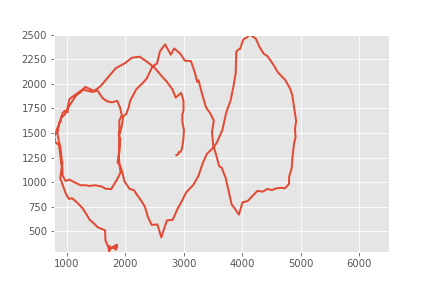

In [99]:
%matplotlib notebook


l_limit_s = l_second # in seconds
u_limit_s  = u_second # in seconds

min_bound = l_bound
max_bound = u_bound

num_frames = rows
print(min_bound, max_bound, num_frames)

ball_x = np.array(ball_df['ball_pos_x'][min_bound:max_bound])
ball_y =  np.array(ball_df['ball_pos_y'][min_bound:max_bound])

xmin = min(ball_x)
xmax = max(ball_x)

ymin = min(ball_y)
ymax = max(ball_y)

fig = plt.figure()
ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return line,

x = []
y = []

def animate(i):
    x.append(ball_x[i])
    y.append(ball_y[i])
    line.set_data(x, y)
#     if x[i] >= l_limit_s+xmax:
#         ax.axes.set_xlim(x[i]-xmax,x[i]+xmax)

    return line,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_frames, interval=10, blit=True)
plt.show()

In [93]:
# !pip install pykalman

<IPython.core.display.Javascript object>


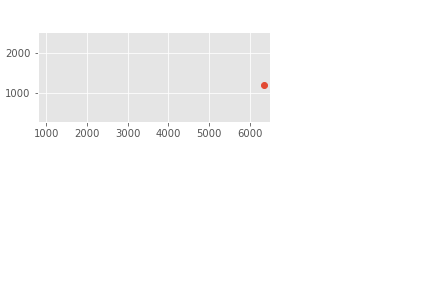

In [94]:
%matplotlib notebook


fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.hold(True)
plt.show(True)
plt.draw()
    
x, y = ball_x[0], ball_y[0]

points = ax.plot(x, y, 'o')[0]
# tic = time.time()

for ii in range(len(ball_x)):

        # update the xy data
        x, y = ball_x[ii], ball_y[ii]
        points.set_data(x, y)

        fig.canvas.draw()




https://stackoverflow.com/questions/19727298/my-algorithm-to-calculate-position-of-smartphone-gps-and-sensors/19764828#19764828

In [ ]:
# 1. Newton - D'Alembert physics for non relativistic speeds dictates this:
// init values
double ax=0.0,ay=0.0,az=0.0; // acceleration [m/s^2]
double vx=0.0,vy=0.0,vz=0.0; // velocity [m/s]
double  x=0.0, y=0.0, z=0.0; // position [m]

// iteration inside some timer (dt [seconds] period) ...
ax,ay,az = accelerometer values
vx+=ax*dt; // update speed via integration of acceleration
vy+=ay*dt;
vz+=az*dt;
 x+=vx*dt; // update position via integration of velocity
 y+=vy*dt;
 z+=vz*dt;

In [ ]:
# 2. the sensor can rotate so the direction must be applied:
// init values
double gx=0.0,gy=-9.81,gz=0.0; // [edit1] background gravity in map coordinate system [m/s^2]
double ax=0.0,ay=0.0,az=0.0; // acceleration [m/s^2]
double vx=0.0,vy=0.0,vz=0.0; // velocity [m/s]
double  x=0.0, y=0.0, z=0.0; // position [m]
double dev[9]; // actual device transform matrix ... local coordinate system
(x,y,z) <- GPS position;

// iteration inside some timer (dt [seconds] period) ...
dev <- compass direction
ax,ay,az = accelerometer values (measured in device space)
(ax,ay,az) = dev*(ax,ay,az);  // transform acceleration from device space to global map space without any translation to preserve vector magnitude
ax-=gx;    // [edit1] remove background gravity (in map coordinate system)
ay-=gy;
az-=gz;
vx+=ax*dt; // update speed (in map coordinate system)
vy+=ay*dt;
vz+=az*dt;
 x+=vx*dt; // update position (in map coordinate system)
 y+=vy*dt;
 z+=vz*dt;

gx,gy,gz is the global gravity vector (~9.81 m/s^2 on Earth)
in code my global Y axis points up so the gy=-9.81 and the rest are 0.0

3. measure timings are critical

Accelerometer must be checked as often as possible (second is a very long time). I recommend not to use timer period bigger than 10 ms to preserve accuracy also time to time you should override calculated position with GPS value. Compass direction can be checked less often but with proper filtration

4. compass is not correct all the time

Compass values should be filtered for some peak values. Sometimes it read bad values and also can be off by electro-magnetic polution or metal enviroment. In that case the direction can be checked by GPS during movement and some corrections can be made. For example chech GPS every minute and compare GPS direction with compass and if it is constantly of by some angle then add it or substract it.

5. why do simple computations on server ???

Hate on-line waste of traffic. Yes you can log data on server (but still i think file on device will be better) but why to heck limit position functionality by internet connection ??? not to mention the delays ...

[Edit 1] additional notes

Edited the code above a little. The orientation must be as precise as it can be to minimize cumulative errors.

Gyros would be better than compass (or even better use them both). Acceleration should be filtered. Some low pass filtering should be OK. After gravity removal I would limit ax,ay,az to usable values and throw away too small values. If near low speed also do full stop (if it is not a train or motion in vacuum). That should lower the drift but increase other errors so an compromise has to be found between them.

Add calibration on the fly. When filtered acceleration = 9.81 or very close to it then the device is probably stand still (unless its a flying machine). Orientation/direction can be corrected by actual gravity direction.

https://stackoverflow.com/questions/53026955/integrating-a-list-of-values-in-python

In [95]:
import scipy.integrate as it
X = [1, 2, 3, 4, 5]
velocity = it.cumtrapz(X,initial=0)
location = it.cumtrapz(velocity,initial=0)
print('velocity: ', velocity)
print( 'location: ', location)

velocity:  [ 0.   1.5  4.   7.5 12. ]
location:  [ 0.    0.75  3.5   9.25 19.  ]


In [96]:
time_series = np.array(ball_IMU['elapsed_time'][2198:2598])
X = np.array(ball_IMU['LINEAR ACCELERATION X (m/s²)'][2198:2598])
Y = np.array(ball_IMU['LINEAR ACCELERATION Y (m/s²)'][2198:2598])
Z = np.array(ball_IMU['LINEAR ACCELERATION Z (m/s²)'][2198:2598])

time_series.shape, X.shape, Y.shape, Z.shape

KeyError: 'LINEAR ACCELERATION X (m/s²)'

In [ ]:

velocity_x = it.cumtrapz(X, time_series)
location_x = it.cumtrapz(velocity_x,time_series[:-1])
velocity_y = it.cumtrapz(Y, time_series)
location_y = it.cumtrapz(velocity_y,time_series[:-1])
velocity_z = it.cumtrapz(Z, time_series)
location_z = it.cumtrapz(velocity_z,time_series[:-1])
print('velocity: ', velocity)
print( 'location: ', location)

In [ ]:
modular_velocity = np.zeros(len(velocity_x))
modular_velocity = [sqrt(velocity_x[i]**2+velocity_y[i]**2+velocity_z[i]**2) for i in range(len(velocity_x))]

location_module = it.cumtrapz(modular_velocity,time_series[:-1])

modular_velocity[:5], location_module[:5]

In [ ]:
fig, axs = plt.subplots(4,1)
fig.set_size_inches(18, 12)

axs[0].plot(time_series[:],X, label='ax')
axs[0].plot(time_series[:],Y, label='ay')
axs[0].plot(time_series[:],Z, label='az')

axs[0].set_ylabel('Acceleration [m/s]',fontsize=14)
axs[0].legend(loc='lower right', frameon=False)

axs[1].plot(time_series[:-1],velocity_x, label='vx')
axs[1].plot(time_series[:-1],velocity_y, label='vy')
axs[1].plot(time_series[:-1],velocity_z, label='vz')

axs[1].set_ylabel('Velocity [m/s]',fontsize=14)
axs[1].legend(loc='lower right', frameon=False)

axs[2].plot(time_series[:-1],modular_velocity, label='velocity')
axs[2].plot(time_series[:-2],location_module, label='location')
axs[2].set_ylabel('Modular Velocity [m/s]',fontsize=14)
axs[2].legend(loc='lower right', frameon=False)

axs[3].plot(time_series[:-2],location_x, label='x')
axs[3].plot(time_series[:-2],location_y, label='y')
axs[3].plot(time_series[:-2],location_z, label='z')

axs[3].set_xlabel('Time [s]',fontsize=14)
axs[3].set_ylabel('Location [m/s]',fontsize=14)
axs[3].legend(loc='lower right', frameon=False)

fig.align_ylabels(axs)